In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("most_followed_ig.csv")

In [3]:
df = df.drop(['ER', 'iPOSTS ON HASHTAG'], axis=1)

In [4]:
df.head()

,RANK,BRAND,CATEGORIES 1,CATEGORIES 2,FOLLOWERS,MEDIA POSTED
0,1,Selena Gomez,celebrities,musicians,105.4Mæ(=),1.2kæ(2135)
1,2,Taylor Swift,celebrities,musicians,95.2Mæ(=),958æ(2669)
2,3,Ariana Grande,celebrities,musicians,92.3Mæ(=),2.8kæ(824)
3,4,Beyonce,celebrities,musicians,90.6Mæ(=),1.4kæ(1897)
4,5,Kim Kardashian West,celebrities,tv,89.3Mæ(=),3.6kæ(550)


In [5]:
df['FOLLOWERS'] = df['FOLLOWERS'].str.extract('(\d+\.\d+)').astype(float)

In [6]:
df['MEDIA POSTED'] = df['MEDIA POSTED'].str.extract('(\d\.\d+k|\d+)')

In [7]:
def transform_thousands(num):
    if 'k' in num:
        return float(num[:-1]) * 1000
    else:
        return num

In [8]:
df['MEDIA POSTED'] = df['MEDIA POSTED'].apply(transform_thousands).astype(int)

In [9]:
df.head()

,RANK,BRAND,CATEGORIES 1,CATEGORIES 2,FOLLOWERS,MEDIA POSTED
0,1,Selena Gomez,celebrities,musicians,105.4,1200
1,2,Taylor Swift,celebrities,musicians,95.2,958
2,3,Ariana Grande,celebrities,musicians,92.3,2800
3,4,Beyonce,celebrities,musicians,90.6,1400
4,5,Kim Kardashian West,celebrities,tv,89.3,3600


<Figure size 864x432 with 0 Axes>

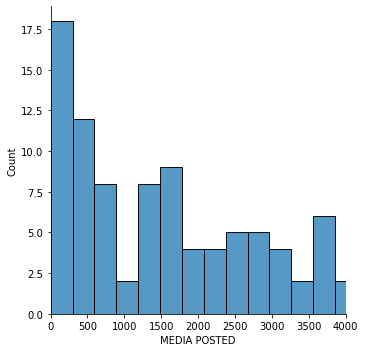

In [79]:
# we can see that by far the most people have not shared more than about 250 posts.
plt.figure(figsize=(12,6))
sns.displot(data=df, x='MEDIA POSTED', bins=30)
plt.xlim(0,4000);

In [11]:
df.describe()

,RANK,FOLLOWERS,MEDIA POSTED
count,100.000000,89.000000,100.000000
mean,50.500000,31.873034,1930.650000
std,29.011492,25.068664,1825.302053
min,1.000000,11.500000,1.000000
25%,25.750000,14.200000,503.250000
50%,50.500000,18.300000,1500.000000
75%,75.250000,45.900000,2950.000000
max,100.000000,105.400000,8900.000000


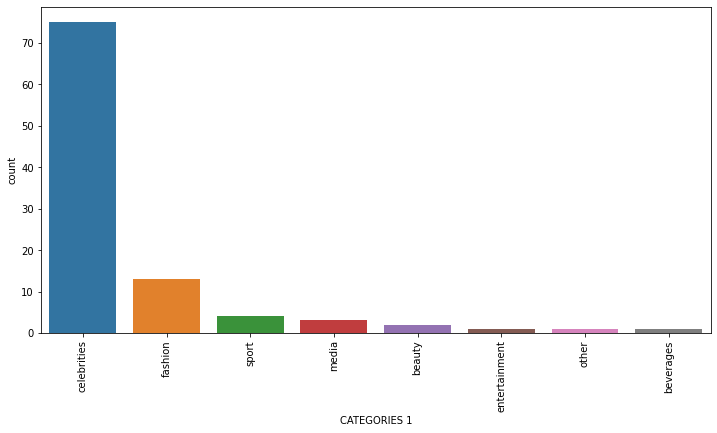

In [18]:
# celebrities post by the most content - although it is hard to distinguish between some of the categories.
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='CATEGORIES 1', order = df['CATEGORIES 1'].value_counts().index)
plt.xticks(rotation=90);

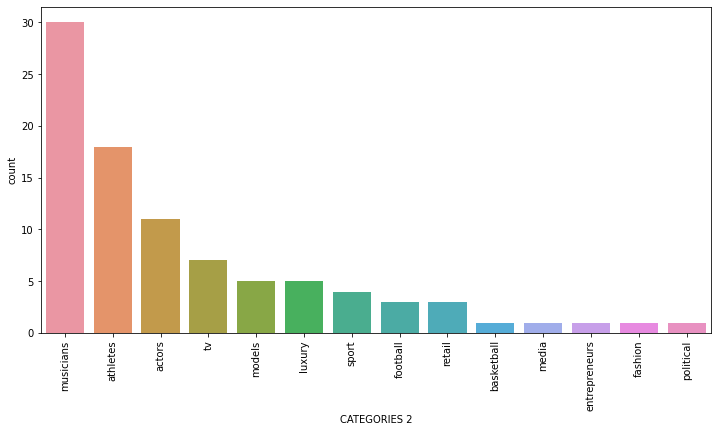

In [17]:
# subcategories are better to differentiate.
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='CATEGORIES 2', order = df['CATEGORIES 2'].value_counts().index)
plt.xticks(rotation=90);

In [24]:
df[df['CATEGORIES 2'] == 'musicians'].describe()

,RANK,FOLLOWERS,MEDIA POSTED
count,30.000000,28.000000,30.000000
mean,43.566667,39.821429,2023.966667
std,31.022443,30.465589,1539.237260
min,1.000000,11.600000,3.000000
25%,18.250000,14.575000,743.750000
50%,40.000000,24.400000,1500.000000
75%,70.750000,58.250000,3125.000000
max,98.000000,105.400000,5800.000000


In [52]:
means = []
for cat in list(df['CATEGORIES 2'].value_counts().index):
    mean = df[df['CATEGORIES 2'] == cat].median()
    means.append(mean)

df_means = pd.DataFrame(data=means, index=df['CATEGORIES 2'].value_counts().index)

C:\Users\wanke\AppData\Local\Temp/ipykernel_16724/1618088323.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df[df['CATEGORIES 2'] == cat].median()


In [77]:
df_means.drop('RANK', axis=1).head()

,FOLLOWERS,MEDIA POSTED
musicians,24.4,1500.0
athletes,18.7,605.5
actors,21.4,718.0
tv,38.2,2100.0
models,36.2,2700.0


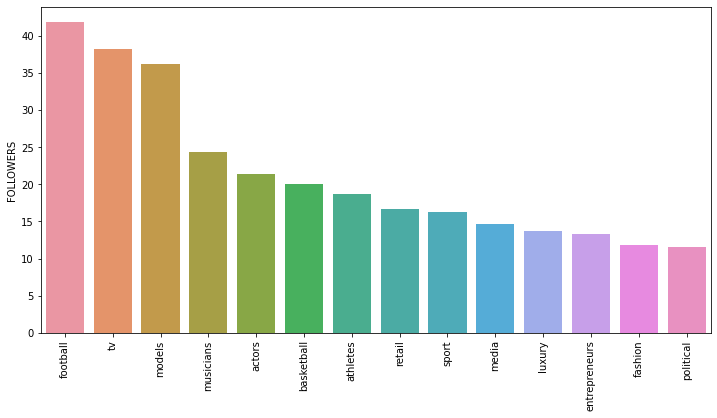

In [76]:
# average number of followers by subcategory
plt.figure(figsize=(12,6))
sns.barplot(data=df_means.drop('RANK', axis=1).sort_values(by=['FOLLOWERS'], ascending=False), x=df_means.drop('RANK', axis=1).sort_values(by=['FOLLOWERS'], ascending=False).index, y='FOLLOWERS')
plt.xticks(rotation=90);

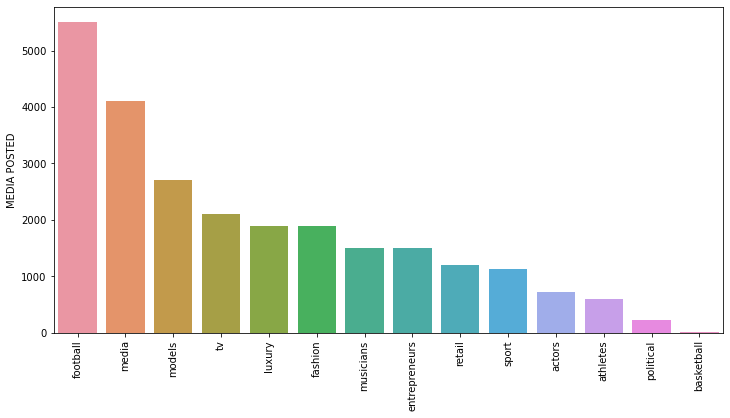

In [78]:
# average number of posts by an individual belonging to a subcategory
plt.figure(figsize=(12,6))
sns.barplot(data=df_means.drop('RANK', axis=1).sort_values(by=['MEDIA POSTED'], ascending=False), x=df_means.drop('RANK', axis=1).sort_values(by=['MEDIA POSTED'], ascending=False).index, y='MEDIA POSTED')
plt.xticks(rotation=90);